In [1]:
import sys
import os

# Adicionar o diretório raiz do projeto ao sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Vai um nível acima de "notebooks"
sys.path.append(project_root)

print("Diretório raiz do projeto adicionado ao sys.path:", project_root)


Diretório raiz do projeto adicionado ao sys.path: C:\Users\luisg\Music\ufma\mineracao-de-dados\diabetes-data-mining


In [2]:
# Imports necessários

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns



In [3]:
# Caminho do arquivo CSV
dataset_path = "../dataset/raw/data_date.csv"

# Carregar o dataset
try:
    df = pd.read_csv(dataset_path, encoding="utf-8")  # Testando UTF-8
    print("✅ Dataset carregado com sucesso usando UTF-8.")
except UnicodeDecodeError:
    df = pd.read_csv(dataset_path, encoding="ISO-8859-1")  # Caso UTF-8 falhe
    print("✅ Dataset carregado com sucesso usando ISO-8859-1.")


✅ Dataset carregado com sucesso usando UTF-8.


In [4]:
# 1️⃣ Visão geral do dataset
print("\n📌 Informações Gerais do Dataset:")
df.info()

print("\n🔍 Primeiras 5 linhas do dataset:")
print(df.head())

print("\n🔍 Últimas 5 linhas do dataset:")
print(df.tail())


📌 Informações Gerais do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17511 entries, 0 to 17510
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       17511 non-null  object
 1   Country    17511 non-null  object
 2   Status     17511 non-null  object
 3   AQI Value  17511 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 547.3+ KB

🔍 Primeiras 5 linhas do dataset:
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good         14
1  2022-07-21    Algeria                        Moderate         65
2  2022-07-21    Andorra                        Moderate         55
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4  2022-07-21  Argentina                        Moderate         63

🔍 Últimas 5 linhas do dataset:
             Date                                            Country  \
17506  2025-01-30  United 

In [5]:
# 2️⃣ Estatísticas descritivas
print("\n📊 Estatísticas descritivas:")
print(df.describe())


📊 Estatísticas descritivas:
          AQI Value
count  17511.000000
mean      63.117755
std       49.969795
min        1.000000
25%       29.000000
50%       53.000000
75%       83.000000
max      963.000000


In [6]:
# 3️⃣ Verificar valores nulos
print("\n🔍 Quantidade de valores nulos por coluna:")
print(df.isnull().sum())


🔍 Quantidade de valores nulos por coluna:
Date         0
Country      0
Status       0
AQI Value    0
dtype: int64


In [7]:
# 4️⃣ Verificar valores únicos por coluna
print("\n🔍 Quantidade de valores únicos por coluna:")
print(df.nunique())


🔍 Quantidade de valores únicos por coluna:
Date         120
Country      142
Status         6
AQI Value    337
dtype: int64


In [8]:
# 5️⃣ Verificar tipos de dados
print("\n📌 Tipos de dados das colunas:")
print(df.dtypes)



📌 Tipos de dados das colunas:
Date         object
Country      object
Status       object
AQI Value     int64
dtype: object


In [9]:
# 6️⃣ Dimensão do dataset
print("\n📏 Dimensão do dataset (linhas, colunas):", df.shape)


📏 Dimensão do dataset (linhas, colunas): (17511, 4)


In [10]:
# 7️⃣ Identificar registros duplicados
print("\n🔍 Número de registros duplicados:", df.duplicated().sum())


🔍 Número de registros duplicados: 300


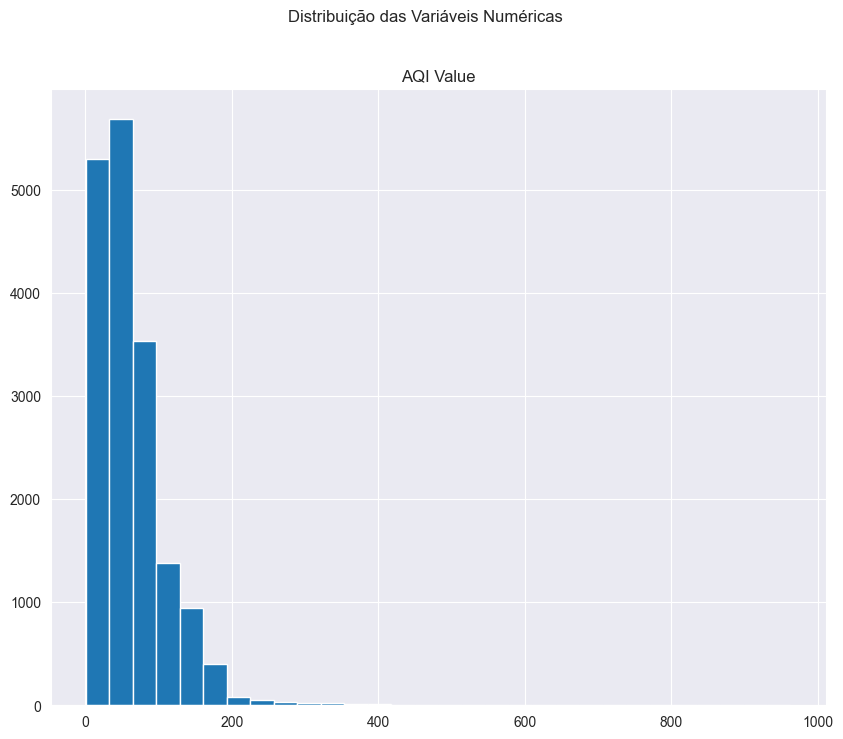

In [11]:
# 8️⃣ Histograma das variáveis numéricas
df.hist(figsize=(10, 8), bins=30)
plt.suptitle("Distribuição das Variáveis Numéricas")
plt.show()


🔍 Frequência das Categorias:

Coluna: Date
Date
2022-07-22    423
2022-07-21    284
2022-07-23    282
2022-07-26    282
2022-08-23    282
             ... 
2024-10-31    120
2024-10-03    119
2024-11-07    119
2024-11-14    119
2024-11-21    118
Name: count, Length: 120, dtype: int64

Coluna: Country
Country
Albania                     129
Andorra                     129
Armenia                     129
Argentina                   129
Austria                     129
                           ... 
Guam                         89
Central African Republic     82
Sudan                        78
Gambia                       71
Saudi Arabia                 29
Name: count, Length: 142, dtype: int64

Coluna: Status
Status
Good                              8342
Moderate                          6351
Unhealthy for Sensitive Groups    1821
Unhealthy                          771
Very Unhealthy                     144
Hazardous                           82
Name: count, dtype: int64


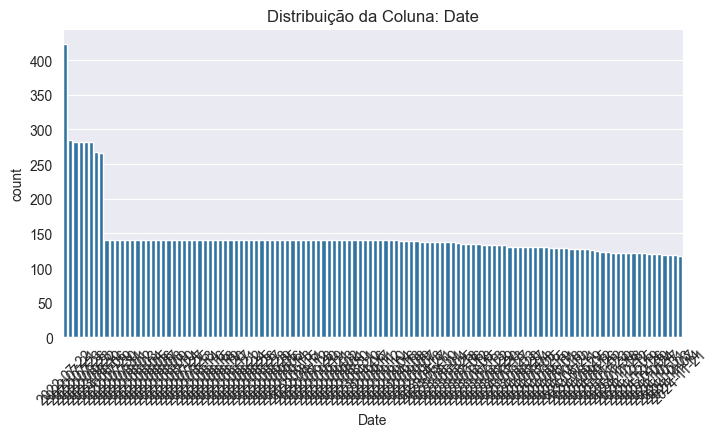

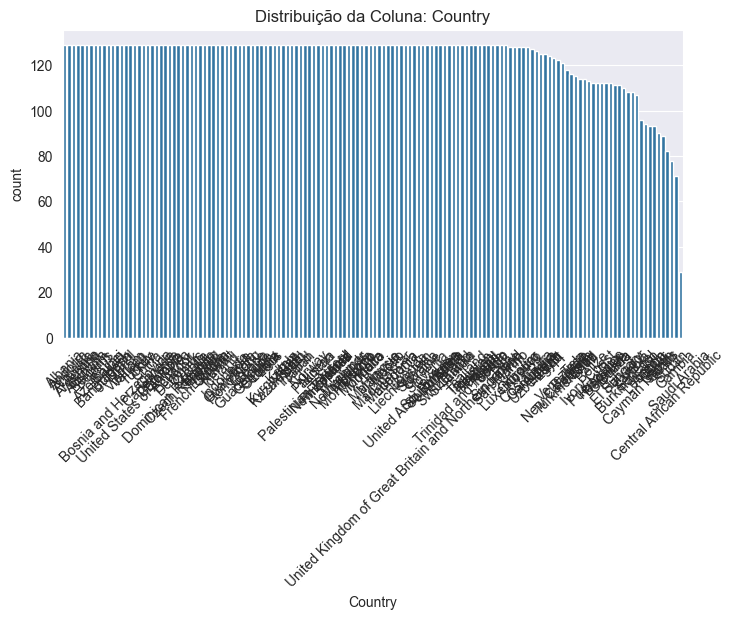

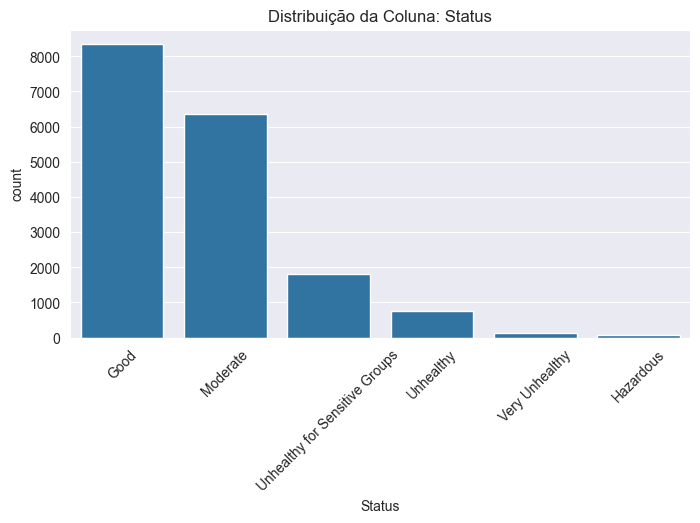

In [12]:
# 9️⃣ Frequência das categorias


print("\n🔍 Frequência das Categorias:")
for col in df.select_dtypes(include="object"):
    print(f"\nColuna: {col}")
    print(df[col].value_counts())

# Gráficos de barras para categorias
for col in df.select_dtypes(include="object"):
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribuição da Coluna: {col}")
    plt.xticks(rotation=45)
    plt.show()

In [13]:
# Verificar valores não numéricos na coluna "AQI Value"

non_numeric_values = df[~df["AQI Value"].apply(lambda x: str(x).replace(".", "", 1).isdigit())]
print("\n🔍 Valores não numéricos na coluna 'AQI Value':")
print(non_numeric_values)


🔍 Valores não numéricos na coluna 'AQI Value':
Empty DataFrame
Columns: [Date, Country, Status, AQI Value]
Index: []


In [14]:
# Remover registros com valores não numéricos na coluna "AQI Value"
df = df[df["AQI Value"].apply(lambda x: str(x).replace(".", "", 1).isdigit())]

# Converter "AQI Value" para numérico
df["AQI Value"] = df["AQI Value"].astype(float)


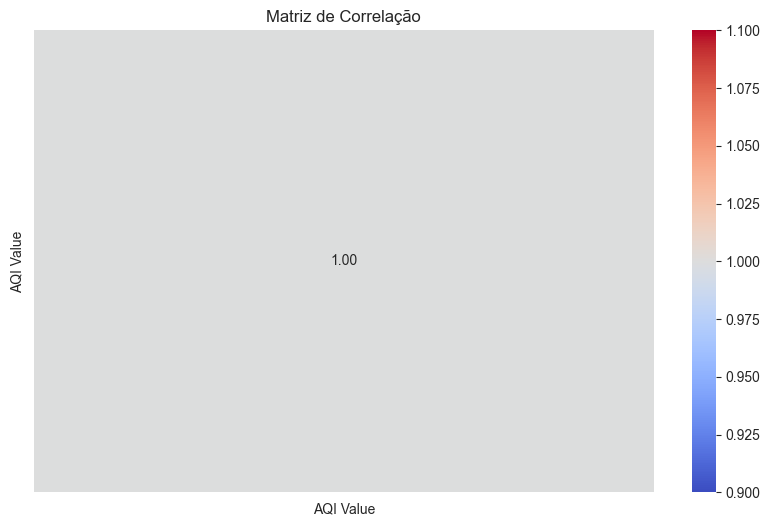

In [15]:
# 1️⃣0️⃣ Matriz de correlação

# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Calcular e exibir a matriz de correlação
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


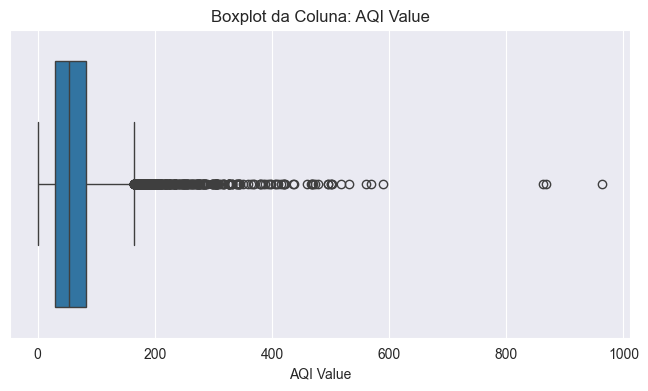

In [16]:
# 1️⃣1️⃣ Detecção de Outliers: Boxplots para variáveis numéricas
for col in df.select_dtypes(include=["float64", "int64"]):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot da Coluna: {col}")
    plt.show()

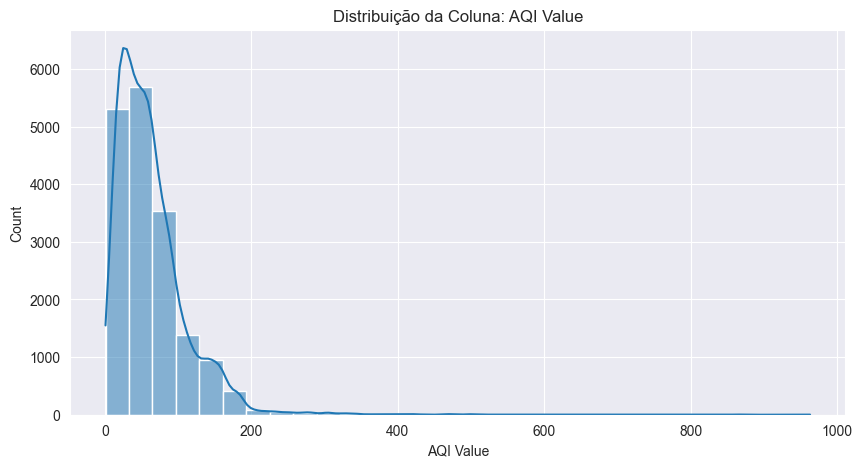

In [17]:
# 1️⃣2️⃣ Resumo estatístico visual
for col in df.select_dtypes(include=["float64", "int64"]):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribuição da Coluna: {col}")
    plt.show()


In [21]:
from scripts.preprocessing import clean_data

# Limpeza dos dados
df = clean_data(df)
print("✅ Dados limpos com sucesso!")


✅ Dados limpos com sucesso!


In [22]:
# Resumo após limpeza
print("\n📊 Resumo dos dados após a limpeza:")
print(f"Dimensões do dataset: {df.shape}")
print(f"Colunas: {df.columns.tolist()}")
print("\n🔍 Tipos de dados:")
print(df.dtypes)
print("\n🔍 Primeiras 5 linhas do dataset:")
print(df.head())


📊 Resumo dos dados após a limpeza:
Dimensões do dataset: (17211, 4)
Colunas: ['Date', 'Country', 'Status', 'AQI Value']

🔍 Tipos de dados:
Date         datetime64[ns]
Country              object
Status               object
AQI Value           float64
dtype: object

🔍 Primeiras 5 linhas do dataset:
        Date    Country                          Status  AQI Value
0 2022-07-21    Albania                            Good      14.00
1 2022-07-21    Algeria                        Moderate      65.00
2 2022-07-21    Andorra                        Moderate      55.00
3 2022-07-21     Angola  Unhealthy For Sensitive Groups     113.00
4 2022-07-21  Argentina                        Moderate      63.00


In [23]:
# Verificar valores únicos nas colunas categóricas
for col in ["Country", "Status"]:
    print(f"\n🔍 Valores únicos em '{col}':")
    print(df[col].value_counts())



🔍 Valores únicos em 'Country':
Country
Uganda                      129
Laos                        129
Taiwan                      129
Armenia                     128
Argentina                   128
                           ... 
Guam                         85
Central African Republic     81
Sudan                        77
Gambia                       71
Saudi Arabia                 28
Name: count, Length: 142, dtype: int64

🔍 Valores únicos em 'Status':
Status
Good                              8210
Moderate                          6237
Unhealthy For Sensitive Groups    1785
Unhealthy                          759
Very Unhealthy                     140
Hazardous                           80
Name: count, dtype: int64


In [24]:
# Exibir todos os valores únicos de "Country"
print("\n🔍 Todos os valores únicos em 'Country':")
print(df["Country"].unique())



🔍 Todos os valores únicos em 'Country':
['Albania' 'Algeria' 'Andorra' 'Angola' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Belize' 'Bermuda' 'Bolivia' 'Bosnia And Herzegovina' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia'
 'Finland' 'France' 'French Guiana' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Gibraltar' 'Greece' 'Grenada' 'Guadeloupe' 'Guam' 'Guatemala'
 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Japan' 'Jersey' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia'
 'Lebanon' 'Liberia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Macao'
 'Macedonia' 'Madagascar' 'Malaysia' 'Mal